In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

survey = pd.read_excel("../research/Survey table.xlsx")
survey.head()


,Paper ID,Title,Year,Methodology,Algorithms Used,Dataset(s) Used,Results,Limitations,Author(s)
0,Paper 1,A Deep Learning Approach for Helmet Detection ...,2025.0,A real-time system to detect motorcyclists wit...,"YOLOv3, OpenCV, EasyOCR/Pytesseract, Haarcasca...","COCO, Custom Kaggle dataset.",95.2% accuracy for helmet detection.,"Struggles with variable lighting, motion blur,...",Sulbha Yadav et al.
1,Paper 2,An Efficient and Layout-Independent ALPR Syste...,2021.0,"End-to-end, layout-independent Automatic Licen...","Modified YOLOv2, Modified Fast-YOLOv2, CR-NET.","8 public datasets (AOLP, UFPR-ALPR, etc.) and ...",96.9% recognition rate; 73 FPS on a high-end GPU.,Not trained for Chinese characters; errors fro...,Rayson Laroca et al.
2,Paper 3,Automated Traffic Violation Detection Using AI...,2025.0,A review paper outlining a general framework f...,"Reviews CNNs, YOLO, SSD, OCR, RNNs/LSTMs.",Discusses the need for large-scale datasets bu...,Summarizes that AI systems can achieve high ac...,"Field-wide issues: data privacy, poor weather ...",Angelina Grace et al.
3,Paper 4,Automatic Traffic Rules Violation Detection an...,2020.0,An automated system for Bangladesh to detect r...,"YOLOv3, OpenCV, CNN in MATLAB.",Pre-recorded video footage; YOLOv3 used defaul...,">90% violation detection (day), 98% ANPR (day).",Accuracy is significantly lower at night; sens...,Raian Shahrear et al.
4,Paper 5,AI-Based Integrated Traffic Violation Detectio...,2025.0,A comprehensive review on AI for traffic viola...,"LoLTV, GA-YOLOv5, Reinforcement Learning, Fede...","References LoLTV, AI City Challenge, Traffic4S...","Synthesizes results: LoLTV (98.2% precision), ...","Lack of Indian datasets, poor performance on e...",Avadhut Dilip sutar


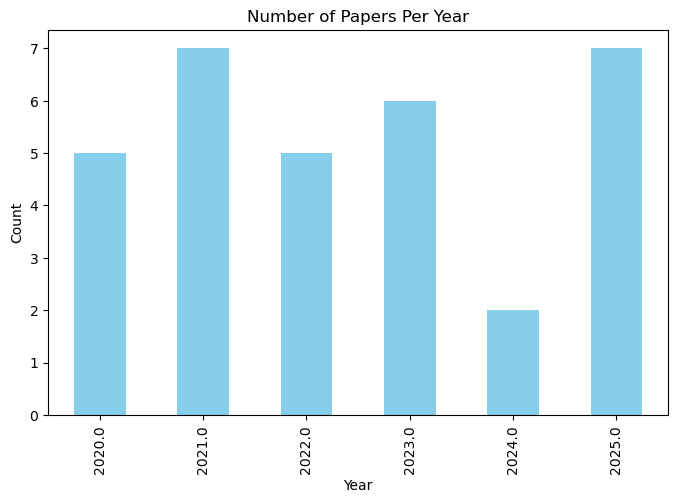

In [3]:
plt.figure(figsize=(8,5))
survey['Year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Number of Papers Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


In [4]:
from collections import Counter

algo_list = []

for entry in survey['Algorithms Used'].dropna():
    items = entry.replace(",", " ").replace("/", " ").split()
    algo_list.extend(items)

algo_counts = Counter(algo_list)

algo_counts


Counter({'YOLOv3': 8,
         'YOLOv8': 6,
         'OCR.': 6,
         'OpenCV': 5,
         'CNN': 5,
         'YOLOv5': 5,
         'OCR': 3,
         'Learning': 3,
         'Tesseract': 3,
         'R-CNN': 3,
         'Faster': 3,
         'EasyOCR': 2,
         'Modified': 2,
         'YOLOv2': 2,
         'CNNs': 2,
         'YOLO': 2,
         'SSD': 2,
         'DPM': 2,
         'Custom': 2,
         'Gaussian': 2,
         'CNN.': 2,
         'OpenCV.': 2,
         'YOLOv7': 2,
         'YOLOv9.': 2,
         'Pytesseract': 1,
         'Haarcascade': 1,
         'classifier.': 1,
         'Fast-YOLOv2': 1,
         'CR-NET.': 1,
         'Reviews': 1,
         'RNNs': 1,
         'LSTMs.': 1,
         'in': 1,
         'MATLAB.': 1,
         'LoLTV': 1,
         'GA-YOLOv5': 1,
         'Reinforcement': 1,
         'Federated': 1,
         'Blockchain.': 1,
         '(Single': 1,
         'Shot': 1,
         'Multi-Box': 1,
         'Detector)': 1,
         '(baseline).': 

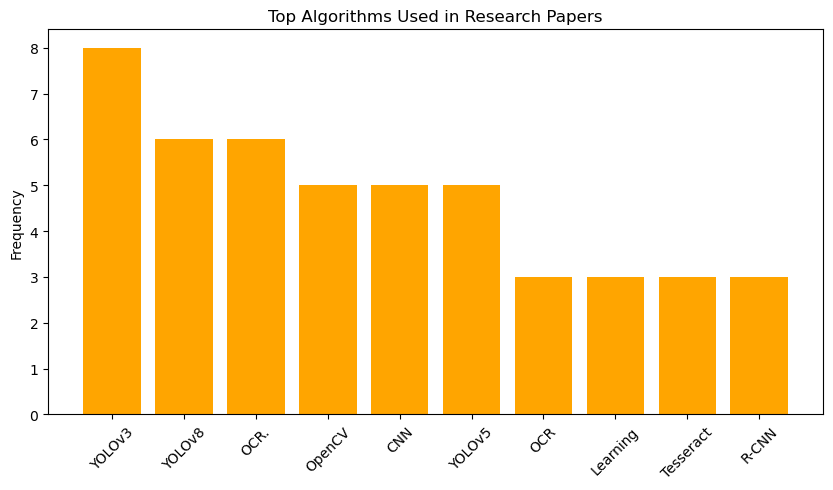

In [5]:
top_algos = dict(algo_counts.most_common(10))

plt.figure(figsize=(10,5))
plt.bar(top_algos.keys(), top_algos.values(), color="orange")
plt.title("Top Algorithms Used in Research Papers")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


In [9]:
import re
from collections import Counter

KNOWN_DATASETS = [
    "UA-DETRAC", "AOLP", "CCPD", "COCO", "MSCOCO", "UFPR-ALPR", 
    "LoLTV", "KITTI", "PKUData", "OpenALPR", "NP-ALPR", "Traffic4Safe",
    "Dhaka-AI", "Kaggle", "City", "Challenge", "Roboflow"
]

detected = []

for text in survey['Dataset(s) Used'].dropna():
    for ds in KNOWN_DATASETS:
        if ds.lower() in text.lower():
            detected.append(ds)

Counter(detected)


Counter({'AOLP': 3,
         'UA-DETRAC': 3,
         'COCO': 2,
         'Kaggle': 2,
         'UFPR-ALPR': 2,
         'LoLTV': 2,
         'CCPD': 2,
         'OpenALPR': 1,
         'Traffic4Safe': 1,
         'City': 1,
         'Challenge': 1,
         'MSCOCO': 1,
         'Roboflow': 1,
         'KITTI': 1,
         'NP-ALPR': 1,
         'PKUData': 1})

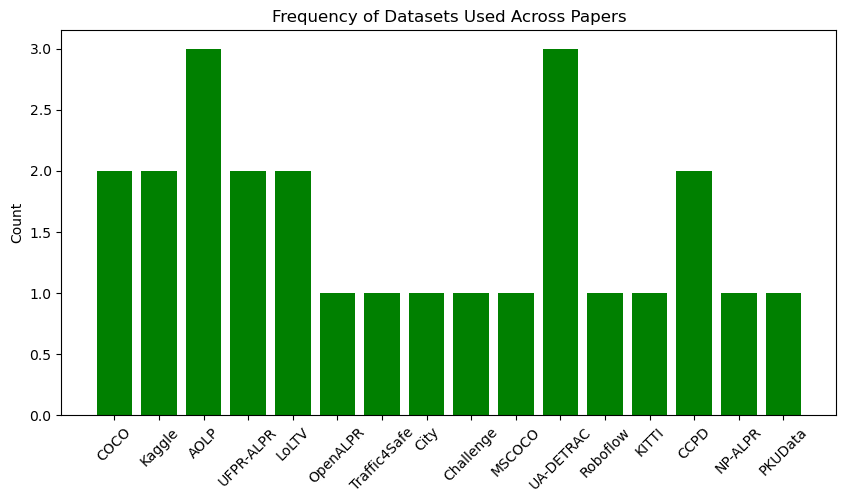

In [10]:
ds_counts = Counter(detected)

plt.figure(figsize=(10,5))
plt.bar(ds_counts.keys(), ds_counts.values(), color="green")
plt.title("Frequency of Datasets Used Across Papers")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [11]:
import re
from collections import Counter

# Clean, meaningful limitation keywords (custom curated)
LIMITATION_KEYWORDS = [
    "low-light", "night", "lighting", "blur", "occlusion", "motion",
    "dataset", "data", "small", "limited", "noise", "shadow",
    "overlap", "crowded", "occluded", "weather", "rain", "fog",
    "real-time", "fps", "speed", "latency", "cost", "compute",
    "infrastructure", "scalability", "resolution", "accuracy",
    "generalization", "localization", "tracking", "annotation",
    "imbalance", "noise", "domain", "transfer", "variation"
]

detected_limits = []

for text in survey['Limitations'].dropna():
    t = text.lower()
    for kw in LIMITATION_KEYWORDS:
        if kw in t:
            detected_limits.append(kw)

Counter(detected_limits)


Counter({'lighting': 9,
         'blur': 7,
         'occlusion': 7,
         'accuracy': 5,
         'motion': 4,
         'shadow': 4,
         'data': 4,
         'weather': 4,
         'night': 4,
         'rain': 2,
         'dataset': 2,
         'crowded': 2,
         'cost': 1,
         'resolution': 1,
         'variation': 1,
         'tracking': 1,
         'speed': 1,
         'occluded': 1,
         'small': 1,
         'overlap': 1})

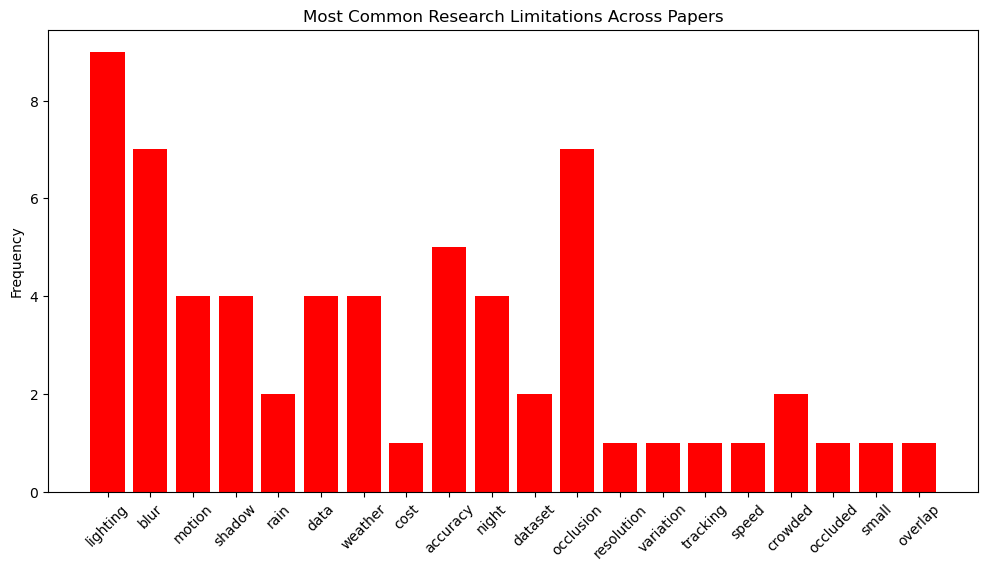

In [12]:
limit_counts = Counter(detected_limits)

plt.figure(figsize=(12,6))
plt.bar(limit_counts.keys(), limit_counts.values(), color="red")
plt.title("Most Common Research Limitations Across Papers")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


In [13]:
GROUPS = {
    "Low-light / Night": ["low-light", "night", "lighting"],
    "Motion / Blur": ["blur", "motion"],
    "Occlusion": ["occlusion", "occluded", "overlap"],
    "Dataset Issues": ["dataset", "small", "limited", "imbalance"],
    "Weather": ["rain", "fog", "weather"],
    "Real-time Constraints": ["real-time", "fps", "latency"],
    "Accuracy Issues": ["accuracy", "generalization", "localization"],
    "Compute Cost": ["cost", "compute", "infrastructure"],
}

group_counts = {}

for group_name, words in GROUPS.items():
    count = sum(limit_counts[w] for w in words if w in limit_counts)
    group_counts[group_name] = count

group_counts


{'Low-light / Night': 13,
 'Motion / Blur': 11,
 'Occlusion': 9,
 'Dataset Issues': 3,
 'Weather': 6,
 'Real-time Constraints': 0,
 'Accuracy Issues': 5,
 'Compute Cost': 1}

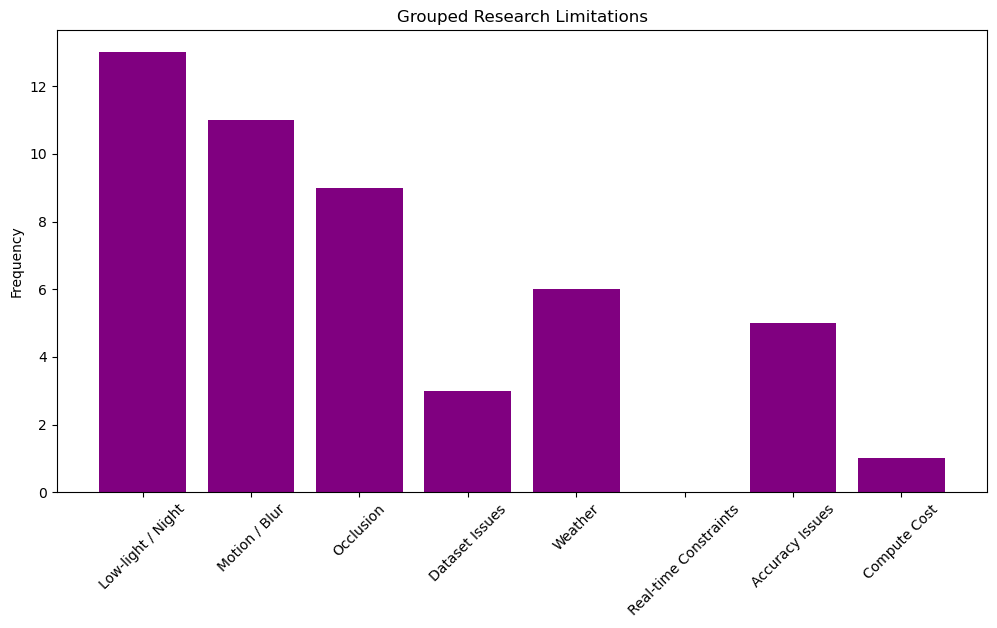

In [14]:
plt.figure(figsize=(12,6))
plt.bar(group_counts.keys(), group_counts.values(), color="purple")
plt.title("Grouped Research Limitations")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()
